# Ydata Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension.

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS):

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [54]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.
import numpy as np
class Ols(object):
  def __init__(self):
    self.w = None

  @staticmethod
  def pad(X):
    return np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)

  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    self._fit(X, Y)

  def _fit(self, X, Y):
    # optional to use this
    if X.ndim == 1:
      X = np.expand_dims(X,axis=-1)
    X = self.pad(X)
    self.w = np.linalg.pinv(X.T@X)@X.T@Y

  def predict(self, X):
    #return wx
    return self._predict(X)


  def _predict(self, X):
    # optional to use this
    if X.ndim == 1:
      X = np.expand_dims(X,axis=-1)
    X = self.pad(X)
    w = self.w
    #w = np.expand_dims(w,axis=-1)
    return X@w

  def score(self, X, Y):
    #return MSE
    if X.ndim == 1:
      X = np.expand_dims(X,axis=-1)
    X = self.pad(X)
    n = Y.shape[0]
    w = self.w
    #w = np.expand_dims(w,axis=-1)
    return np.sum((X @ w - Y)**2)/n

In [55]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data.shape

(506, 13)

In [56]:
boston_model = Ols()
boston_model.fit(data, target)
target_pred = boston_model.predict(data)
boston_model.score(data, target)

21.894831181729206

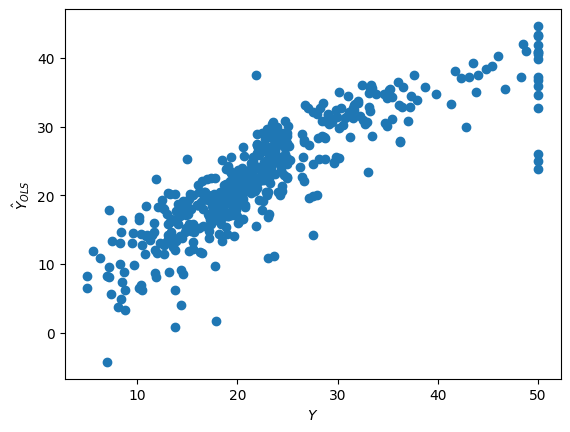

In [57]:
import matplotlib.pyplot  as plt

plt.scatter(target, target_pred)
plt.xlabel('$Y$')
plt.ylabel('$\hat{Y}_{OLS}$')
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
np.random.seed(3788)
MSE_train = []
MSE_test = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)
    boston_model.fit(X_train, y_train)
    #boston_model.predict(X_test)
    MSE_train.append(boston_model.score(X_train, y_train))
    MSE_test.append(boston_model.score(X_test, y_test))

print('Average MSE on train:',np.mean(MSE_train))
print('Average MSE on test:', np.mean(MSE_test))

Average MSE on train: 21.648569637885448
Average MSE on test: 23.792082346470586


$H_0: MSE_{train} = MSE_{test}$

$H_1:MSE_{train} <  MSE_{test}$

In [59]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(MSE_train, MSE_test,alternative='less')
p_value

0.08411726410730833

P-value < 10%. Hense we reject $H_0$.

In [60]:
# Write a new class OlsGd which solves the problem using gradinet descent.
# The class should get as a parameter the learning rate and number of iteration.
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate?
# How would you find number of iteration automatically?
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    pass

  def fit(self, X):
    #self.X_min = X.T.min(axis=1)
    #self.X_max = X.T.max(axis=1)
    self.X_mean = X.T.mean(axis=1)
    self.X_std = X.T.std(axis=1)


  def predict(self, X):
    #apply normalization
    #return (X-self.X_min)/(self.X_max - self.X_min)
    return (X-self.X_mean)/self.X_std

class OlsGd(Ols):

  def __init__(self, learning_rate=.05,
               num_iteration=1000,
               normalize=True,
               early_stop=True,
               verbose=True):

    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()
    self.verbose = verbose


  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    self.X = X
    self.Y = Y
    norm_X = Normalizer()
    norm_X.fit(X)
    X = norm_X.predict(X)
    X = self.pad(X)
    n = Y.shape[0]
    w = np.random.uniform(-1, 1, (X.shape[1]))
    self.losses = []
    for i in range(self.num_iteration):
      loss = np.dot(X, w) - Y
      grad = 2/n * X.T @ (X @ w - Y)
      w = w - self.learning_rate*grad
      if self.early_stop and np.linalg.norm(grad - w) < 1e-6:
            break
      if track_loss:
            self.losses.append(loss)

      if self.verbose:
            print("Weights: {}, loss: {}".format(w, loss))
    self.w = w


  def _predict(self, X):
    #remeber to normalize the data before starting
    norm = Normalizer()
    norm.fit(self.X)
    X = norm.predict(X)
    X = self.pad(X)
    w = self.w
    w = np.expand_dims(w,axis=-1)
    return X@w

  def _step(self, X, Y):
    # use w update for gradient descent
    pass



Average MSE on test: 63.58600734148525
Average MSE on train: 54.25128575966929


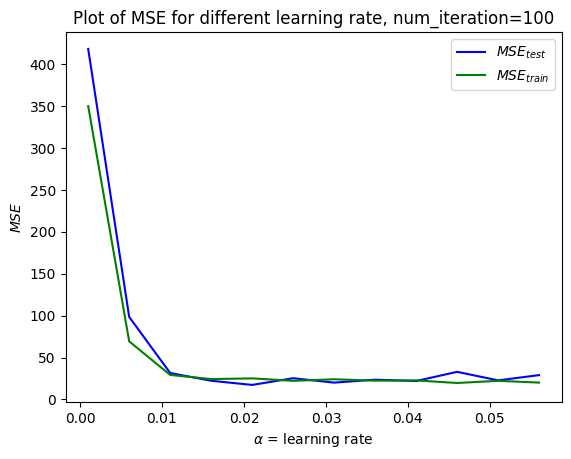

In [61]:
mse_train = []
mse_test = []
alpha_range = np.arange(0.001,0.061,0.005)
for alpha in alpha_range:
  #print("----------------------------")
  X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.25)
  model = OlsGd(learning_rate=alpha, num_iteration=100, verbose=False);
  model.fit(X_train,Y_train);
  model.predict(X_test);
  norm = Normalizer()
  norm.fit(X_train)
  X_train = norm.predict(X_train)
  X_test = norm.predict(X_test)
  mse_train.append(model.score(X_train,Y_train))
  mse_test.append(model.score(X_test,Y_test))
  #print('коэфициэнты Градиентного спуска')
  #print(model.w)
  #print(mse_test)
  #print(mse_train)
  #norm = Normalizer()
  #norm.fit(X_train)
  #X_train = norm.predict(X_train)
  #model = Ols();
  #model.fit(X_train,Y_train);
  #model.predict(X_test);
  #print('коэфициэнты аналитического решения')
  #print(model.w)
  #mse_O = model.score(X_train,Y_train)

plt.plot(alpha_range,mse_test,color='blue',label='$MSE_{test}$')
plt.plot(alpha_range,mse_train,color='green',label='$MSE_{train}$')
plt.title('Plot of MSE for different learning rate, num_iteration=100');
plt.legend()
plt.ylabel('$MSE$')
plt.xlabel('$\\alpha$ = learning rate');
print('Average MSE on test:',sum(mse_test)/len(mse_test))
print('Average MSE on train:',sum(mse_train)/len(mse_train))


With a small learning rate, gradient descent slowly approach to the correct weights $w$, requiring more iterations to approach to the correct weights $w$. Larger steps approach weights $w$ faster,what requirs fewer iterations

How would you find number of iteration automatically?


At values ​​of n at which the MSE value does not change much

 Gradient Descent does not work well when features are not scaled evenly (why?!).
 If features are not scaled so $\\w$ also not scaled (It could be $\\w_1=10$ and $\\w =10^{10}$).It is not neccery that GD will find this minimum of MSE. Also it affects the speed of gradient descent.
 (Before normalization level lines of MSE are elongated ovals, after it is a round)

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression. Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation?



$L = (Xw - y)^T(Xw - y) + λw^Tw → min$

$∇_w L = X^T(Xw-y) + (Xw-y)^TX + λ(I^Tw + w^TI) = X^TXw-X^Ty + X^T(Xw-y) +λ(I^Tw+I^Tw) =$
$= 2X^TXw-2X^Ty+2λI^Tw = 0$

$(X^TX+λI^T)w = X^Ty$

$w = (X^TX + λI^T)^{-1}X^Ty$

$w = (X^TX + λI)^{-1}X^Ty$

In [47]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda

  def _fit(self, X, Y):
    #Closed form of ridge regression
    X = self.pad(X)
    self.w = np.linalg.pinv(X.T@X+self.ridge_lambda*np.identity(X.shape[1]))@X.T@Y

In [48]:
model = RidgeLs(ridge_lambda = 1);
model._fit(X_train,Y_train);
model.predict(X_test);
print('MSE on train:',model.score(X_train,Y_train))
print('MSE on test:',model.score(X_test,Y_test))
model = Ols();
model.fit(X_train,Y_train);
model.predict(X_test);
print('MSE on train:',model.score(X_train,Y_train))
print('MSE on test:',model.score(X_test,Y_test))

MSE on train: 19.848372136709273
MSE on test: 29.07927423101533
MSE on train: 19.843189238144642
MSE on test: 28.96145204617057


In [49]:
class RidgeLsGd(OlsGd):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLsGd,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    #self.normalizer = Normalizer()

  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    self.X = X
    self.Y = Y
    norm_X = Normalizer()
    norm_X.fit(X)
    X = norm_X.predict(X)
    X = self.pad(X)
    p = X.shape[1]
    n = X.shape[0]
    w = np.random.uniform(-1, 1, (X.shape[1]))
    for i in range(self.num_iteration):
      grad = 2/n * ((X.T @ X + self.ridge_lambda * np.identity(p))@w - X.T@Y)
      w = w - self.learning_rate*grad
    self.w = w

In [50]:
model = RidgeLsGd(ridge_lambda = 0,learning_rate=0.05, num_iteration=100, verbose=False);
model._fit(X_train,Y_train);
model.predict(X_test);
print('MSE on train:',model.score(X_train,Y_train))
print('MSE on test:',model.score(X_test,Y_test))
model = OlsGd(learning_rate=0.05, num_iteration=100, verbose=False);
model._fit(X_train,Y_train);
model.predict(X_test);
print('MSE on train:',model.score(X_train,Y_train))
print('MSE on test:',model.score(X_test,Y_test))

MSE on train: 20.08713276878415
MSE on test: 28.93228508272275
MSE on train: 20.04095021692539
MSE on test: 28.958364198183336


### Use scikitlearn implementation for OLS, Ridge and Lasso

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
coef = [reg.intercept_]
coef.extend(reg.coef_)
norm = Normalizer()
norm.fit(X_train)
X_train = norm.predict(X_train)
model = Ols();
model.fit(X_train,Y_train);
coef =np.array([coef, model.w])
print('Coeffitients of OLS method using scikitlearn and OUR Functions')
print(coef.T)



Coeffitients of OLS method using scikitlearn and OUR Functions
[[ 2.20749340e+01  2.20749340e+01]
 [-9.63097047e-01 -9.63097047e-01]
 [ 1.16892365e+00  1.16892365e+00]
 [ 1.72883256e-01  1.72883256e-01]
 [ 7.02265295e-01  7.02265295e-01]
 [-2.40182484e+00 -2.40182484e+00]
 [ 2.51460397e+00  2.51460397e+00]
 [ 1.99220779e-02  1.99220779e-02]
 [-3.12811105e+00 -3.12811105e+00]
 [ 2.53606749e+00  2.53606749e+00]
 [-2.23230666e+00 -2.23230666e+00]
 [-2.07730834e+00 -2.07730834e+00]
 [ 7.27144391e-01  7.27144391e-01]
 [-3.39860984e+00 -3.39860984e+00]]


In [52]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)
coef = [clf.intercept_]
coef.extend(clf.coef_)
model = RidgeLs(ridge_lambda = 1.0);
model._fit(X_train,Y_train);
coef =np.array([coef, model.w])
print('Coeffitients of OLS method using scikitlearn and OUR Functions')
print(coef.T)

Coeffitients of OLS method using scikitlearn and OUR Functions
[[ 2.20749340e+01  2.20168421e+01]
 [-9.52277379e-01 -9.52277379e-01]
 [ 1.14819885e+00  1.14819885e+00]
 [ 1.43709918e-01  1.43709918e-01]
 [ 7.05230484e-01  7.05230484e-01]
 [-2.36276261e+00 -2.36276261e+00]
 [ 2.52609413e+00  2.52609413e+00]
 [ 1.20761420e-02  1.20761420e-02]
 [-3.09251281e+00 -3.09251281e+00]
 [ 2.44515173e+00  2.44515173e+00]
 [-2.14897670e+00 -2.14897670e+00]
 [-2.06663935e+00 -2.06663935e+00]
 [ 7.27493641e-01  7.27493641e-01]
 [-3.38309368e+00 -3.38309368e+00]]


In [53]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,Y_train)
coef = [clf.intercept_]
coef.extend(clf.coef_)
coef

[22.074934036939315,
 -0.6832687789334926,
 0.7916112393563544,
 -0.0,
 0.6665561469042093,
 -1.91031545517447,
 2.679672424596247,
 -0.0,
 -2.4888415233583614,
 1.0857442463675235,
 -1.0253426702976953,
 -1.940594057377358,
 0.6458953662396753,
 -3.357729404127583]